In [ ]:
% pip install pandas seaborn matplotlib

In [2]:
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# This  noteboook is to detect an anomalous IP address
df_train = pd.read_csv('preprocessed/preprocessed_openstack_train.csv')

# Calculate request frequency by IP
ip_activity_train = df_train['internal_ip'].value_counts().reset_index()
ip_activity_train.columns = ['internal_ip', 'request_count']

# Merge request counts back to the dataset
df_train = df_train.merge(ip_activity_train, on='internal_ip', how='left')

# Optional: Calculate error rate per IP
if 'log_level' in df_train.columns:
    df_train['is_error'] = (df_train['log_level'] == 'ERROR').astype(int)
    ip_error_rate = df_train.groupby('internal_ip')['is_error'].mean().reset_index()
    ip_error_rate.columns = ['internal_ip', 'error_rate']
    df_train = df_train.merge(ip_error_rate, on='internal_ip', how='left')


/var/folders/wk/l8__rsrn5v73832q54dxsh480000gn/T/ipykernel_11717/4131953128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ips, x='internal_ip', y='request_count', palette='viridis')


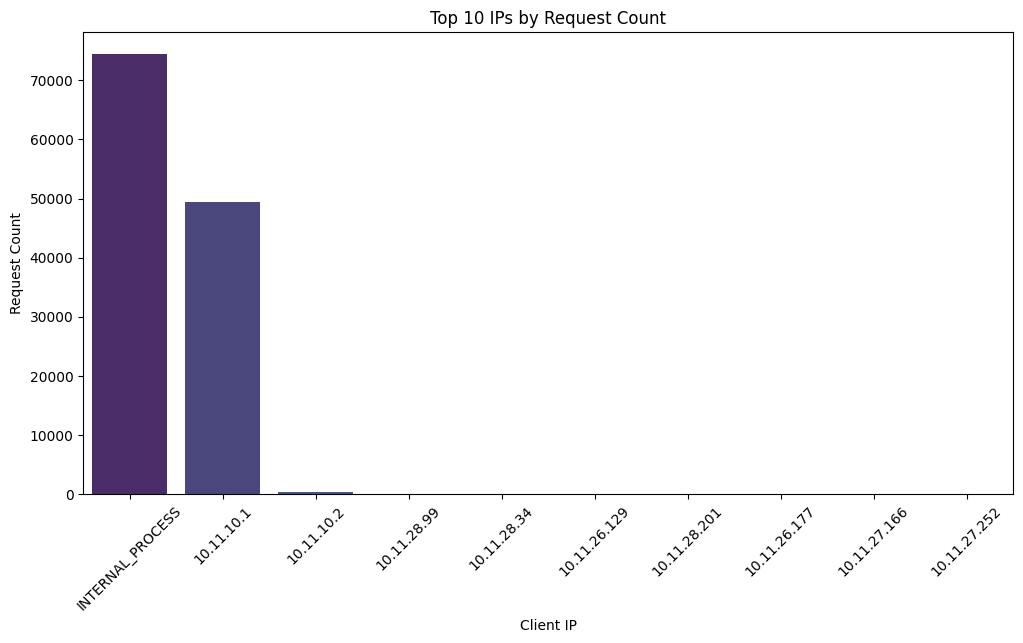

In [4]:
# Top IPs by request count
top_ips = ip_activity_train.head(10)

# Bar chart of top IPs
plt.figure(figsize=(12, 6))
sns.barplot(data=top_ips, x='internal_ip', y='request_count', palette='viridis')
plt.title('Top 10 IPs by Request Count')
plt.xlabel('Client IP')
plt.ylabel('Request Count')
plt.xticks(rotation=45)
plt.show()


/var/folders/wk/l8__rsrn5v73832q54dxsh480000gn/T/ipykernel_11717/2422430613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ip_activity_train, y='request_count', palette='coolwarm')


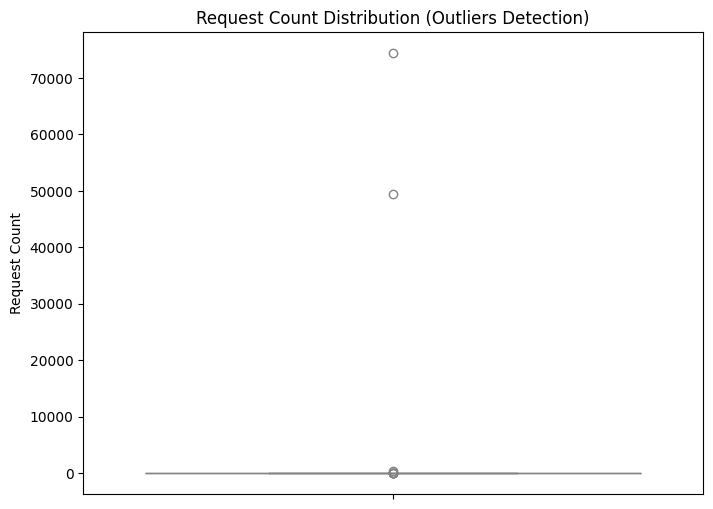

In [5]:
# Boxplot to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=ip_activity_train, y='request_count', palette='coolwarm')
plt.title('Request Count Distribution (Outliers Detection)')
plt.ylabel('Request Count')
plt.show()
